#**Training Stage**


###Importing the necessary Libraries

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys 
import numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics
import matplotlib
matplotlib.use("Agg")
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report



###Know the shape of the spectrograms

In [ ]:
import cv2
img=cv2.imread('/content/Round2_OS_07_05/Train_phase/train/nocalls/r2negcalls_callsMMMcalls101_0000.png')
img.shape

(607, 414, 3)

###Enter the test and train data, its size and no. of samples

In [ ]:
train_data_path = '/content/Round2_OS_07_05/Train_phase/train'
test_data_path = '/content/Round2_OS_07_05/Train_phase/test'
img_width, img_height = 607, 414
nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
nb_test_samples = sum(len(files) for _, _, files in os.walk(test_data_path))

epochs = 100
batch_size = 157
print("train_samples are",nb_train_samples)
print("test_samples_are",nb_test_samples)

train_samples are 1570
test_samples_are 201


###Basic Model

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model2 = Sequential()
model2.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.6))



model2.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.6))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model2.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 203, 138, 64)      4864      
_________________________________________________________________
activation_21 (Activation)   (None, 203, 138, 64)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 203, 138, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 68, 46, 64)        102464    
_________________________________________________________________
activation_22 (Activation)   (None, 68, 46, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 68, 46, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 23, 16, 128)      

In [ ]:

train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_batchsize = 156

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)


history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples, 
    epochs=epochs,
    
    )
model2.save('wavelet_pcen_preprocess_Srkws.h5')


Found 1570 images belonging to 3 classes.
Epoch 1/100
1570/1570 [==============================] - 1654s 1s/step - loss: -712013495.6353 - accuracy: 0.5006
Epoch 2/100
1570/1570 [==============================] - 1653s 1s/step - loss: -25104055988.4322 - accuracy: 0.5007
Epoch 3/100
1212/1570 [======================>.......] - ETA: 6:17 - loss: -134067011115.0891 - accuracy: 0.5007

##Performing Training using VGG-16 model

In [ ]:
import keras
vgg16_model=keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
for layer in model.layers:
    layer.trainable=False
model.add(Dense(1, activation='softmax'))
#model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=1e-8)

train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_batchsize = 157

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)


history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples, 
    epochs=5,
    
    )
model.save('preprocess_Srkws.h5')


Found 1570 images belonging to 2 classes.
Epoch 1/5
1199/1570 [=====================>........] - ETA: 8:53 - loss: 7.6768 - accuracy: 0.4993

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
model.fit_generator(train_batches,steps_per_epoch=250,epochs=250,verbose=2)
model.save('VGG_Srkws.h5')


Epoch 1/250
 - 43s - loss: 0.3894 - accuracy: 0.8106
Epoch 2/250
 - 42s - loss: 0.3925 - accuracy: 0.8094
Epoch 3/250
 - 42s - loss: 0.3836 - accuracy: 0.8177
Epoch 4/250
 - 42s - loss: 0.3814 - accuracy: 0.8209
Epoch 5/250
 - 41s - loss: 0.3794 - accuracy: 0.8193
Epoch 6/250
 - 41s - loss: 0.3658 - accuracy: 0.8363
Epoch 7/250
 - 40s - loss: 0.3718 - accuracy: 0.8258
Epoch 8/250
 - 41s - loss: 0.3646 - accuracy: 0.8320
Epoch 9/250
 - 40s - loss: 0.3660 - accuracy: 0.8335
Epoch 10/250
 - 40s - loss: 0.3593 - accuracy: 0.8374
Epoch 11/250
 - 40s - loss: 0.3630 - accuracy: 0.8320
Epoch 12/250
 - 40s - loss: 0.3635 - accuracy: 0.8331
Epoch 13/250
 - 40s - loss: 0.3542 - accuracy: 0.8409
Epoch 14/250
 - 40s - loss: 0.3609 - accuracy: 0.8325
Epoch 15/250
 - 40s - loss: 0.3572 - accuracy: 0.8354
Epoch 16/250
 - 40s - loss: 0.3538 - accuracy: 0.8350
Epoch 17/250
 - 40s - loss: 0.3529 - accuracy: 0.8386
Epoch 18/250
 - 40s - loss: 0.3560 - accuracy: 0.8350
Epoch 19/250
 - 40s - loss: 0.3511 - 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


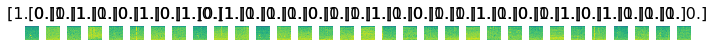

In [ ]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

imgs, labels = next(train_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


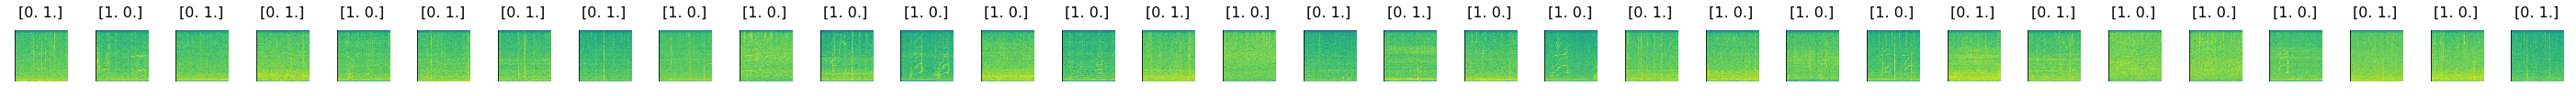

In [ ]:
# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

##Make Predictions using VGG-16

In [ ]:
predictions=model.predict_generator(test_batches,steps=225,verbose=0)
predictions[0:10]

array([[0.24335767, 0.7566424 ],
       [0.2983613 , 0.70163864],
       [0.370002  , 0.629998  ],
       [0.6755965 , 0.32440352],
       [0.90770596, 0.09229406],
       [0.31044376, 0.68955624],
       [0.34705758, 0.6529424 ],
       [0.34993353, 0.65006644],
       [0.85084295, 0.14915703],
       [0.05222579, 0.9477742 ]], dtype=float32)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

Using TensorFlow backend.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [ ]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [ ]:
train_path='/content/Round2_OS_07_05/train'
test_path='/content/Round2_OS_07_05/test'

In [ ]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['calls','nocalls'])
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'])


Found 1570 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [ ]:
import keras

In [ ]:
vgg16_model=keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 18s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:

model.add(Dense(2, activation='softmax'))

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:

import tensorflow as tf

In [ ]:

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
	metrics=["accuracy"])

In [ ]:
%cd /content/

/content


In [ ]:
model.fit_generator(train_batches,steps_per_epoch=200,epochs=250,verbose=2)
model.save('PCEN_VGG_Srkw.h5')
from google.colab import files
files.download('PCEN_VGG_Srkw.h5') 

Epoch 1/250
 - 56s - loss: 0.4360 - accuracy: 0.8099
Epoch 2/250
 - 51s - loss: 0.3671 - accuracy: 0.8503
Epoch 3/250
 - 51s - loss: 0.2841 - accuracy: 0.8908
Epoch 4/250
 - 51s - loss: 0.3262 - accuracy: 0.8656
Epoch 5/250
 - 51s - loss: 0.2525 - accuracy: 0.8973
Epoch 6/250
 - 52s - loss: 0.2321 - accuracy: 0.9100
Epoch 7/250
 - 51s - loss: 0.2119 - accuracy: 0.9212
Epoch 8/250
 - 52s - loss: 0.1912 - accuracy: 0.9315
Epoch 9/250
 - 53s - loss: 0.1831 - accuracy: 0.9325
Epoch 10/250
 - 54s - loss: 0.1700 - accuracy: 0.9414
Epoch 11/250
 - 53s - loss: 0.1916 - accuracy: 0.9237
Epoch 12/250
 - 55s - loss: 0.1552 - accuracy: 0.9467
Epoch 13/250
 - 54s - loss: 0.1349 - accuracy: 0.9546
Epoch 14/250
 - 54s - loss: 0.1423 - accuracy: 0.9519
Epoch 15/250
 - 55s - loss: 0.1318 - accuracy: 0.9567
Epoch 16/250
 - 54s - loss: 0.1172 - accuracy: 0.9651
Epoch 17/250
 - 55s - loss: 0.1155 - accuracy: 0.9629
Epoch 18/250
 - 53s - loss: 0.1264 - accuracy: 0.9572
Epoch 19/250
 - 53s - loss: 0.1418 - 

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


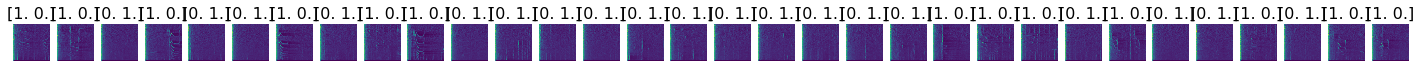

In [ ]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(25,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

imgs, labels = next(test_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

In [ ]:
predictions=model.predict_generator(test_batches,steps=225,verbose=0)

In [ ]:
predictions[0:10]

array([[1.0000000e+00, 1.9244912e-14],
       [9.9982327e-01, 1.7678154e-04],
       [7.4731041e-04, 9.9925262e-01],
       [1.0000000e+00, 5.8871524e-10],
       [5.7765973e-01, 4.2234024e-01],
       [3.2401673e-02, 9.6759832e-01],
       [1.0000000e+00, 6.5675868e-12],
       [1.9867981e-03, 9.9801314e-01],
       [9.9985743e-01, 1.4260295e-04],
       [1.0000000e+00, 2.0798050e-13]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


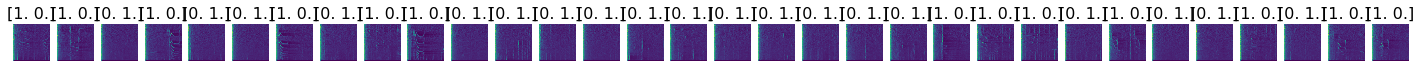

In [ ]:
# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

In [ ]:


import IPython
print(IPython.sys_info())


{'commit_hash': 'b467d487e',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python3.6/dist-packages/IPython',
 'ipython_version': '5.5.0',
 'os_name': 'posix',
 'platform': 'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'}


UsageError: Line magic function `%ipython` not found.


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
test_data_path=test_path